# This notebook will let us explore the basics of dimension reduction and explore different ways of plotting our dimension-reduced data.

In [16]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

Uncomment the lines below if using with Google Colab to upload the dataset.

In [4]:
# from google.colab import files
# uploaded = files.upload()



(617, 6250)


Here, we load a dataset from the 2p_zebrafish example data. The 'raw_C' text file contains an array of neurons x time, which was processed using Caiman (Online). Below, we truncate the array and use a smaller subset of it for demonstration purposes. 

(617, 6250)
(317, 1249)


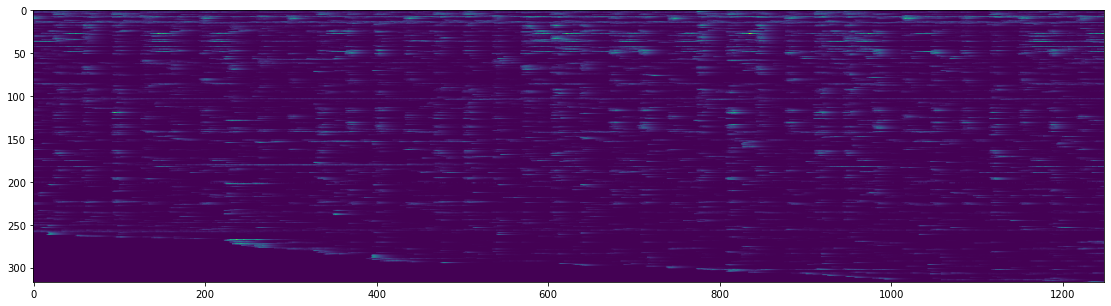

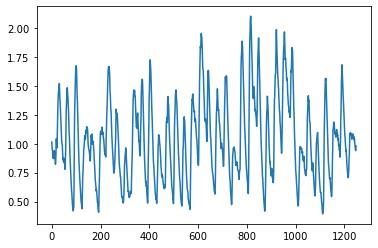

In [47]:
X_in = np.loadtxt('raw_C.txt')
print(X_in.shape)
fig = plt.figure(figsize=(20,5))
plt.imshow(X_in[300:,5000:-1])

X = X_in[300:, 5000:-1]
print(X.shape)
fig = plt.figure()
plt.plot(np.mean(X, axis=0))

The visual stimuli that were displayed to the fish is described in the 'stimmed' text file. The most relevant columns are the 0th column containing the frame number during which the stimulus started, and the 2nd column containing the angle of the directional stimulus being displayed.

In [69]:
stim = np.loadtxt('stimmed.txt')
print(stim.shape)
print(stim[:,2])
color = ['limegreen', 'yellow', 'darkorange', 'orangered', 'purple', 'indigo', 'mediumblue', 'dodgerblue', 'cyan']


(179, 8)
[  0. 270. 315. 135. 225. 180.  90.  45. 315. 135. 180. 225. 270.  90.
  45.   0. 330. 240. 270. 150. 195. 300.  30.  45. 345. 150. 225. 300.
 165. 315. 240.  15. 270. 135.  45. 240.   0. 120. 210. 225. 225.  90.
 150. 315. 330.  90. 300. 135. 210.  60.  45. 285. 150. 165. 150.  75.
 180.   0.  30. 135.  15.  90. 210. 180.  30. 330. 300. 195. 255. 225.
  30. 135. 165. 210. 300.  75. 120. 165.  15.  75. 165. 135.  75. 180.
 135. 150. 255.  30.  60. 135. 330. 300.  60. 240.  90. 315. 255.   0.
 210. 210.  60. 240.  15. 240. 135. 300. 120. 210. 195. 210. 255. 330.
 330. 150. 165.  75. 165. 105.  90. 300. 270.  90. 285. 330. 195.  15.
 315.  90. 105. 195. 135. 150. 210. 135. 315. 120.  15. 105. 345. 225.
 135.   0. 195. 150. 225.  60.  90. 345. 105.  60.  30. 225. 315. 285.
   0. 210. 225.  60. 120. 180.  90. 315. 300.  30. 165. 255. 150. 330.
 210. 195. 300.  15. 315. 330. 225. 345. 300.  45. 180.]


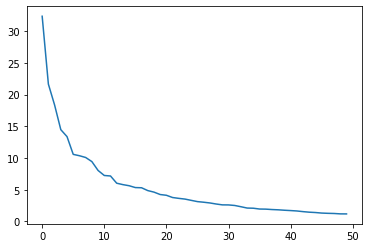

In [20]:
def z_score(X):
    # X: ndarray, shape (n_features, n_samples)
    ss = StandardScaler(with_mean=True, with_std=True)
    Xz = ss.fit_transform(X.T).T
    return Xz

Xz = z_score(X)
c = np.cov(Xz, rowvar=True) # covariance matrix
eig_vals, eig_vecs = np.linalg.eig(c)
srt = np.argsort(eig_vals)[::-1]
# print('Sorted eigenvalues: \n{}'.format(eig_vals[srt]))
# print('\nFirst eigenvector: \n{}'.format(eig_vecs[:, srt][:, 0]))

plt.plot(eig_vals[srt][:50])

(20, 1249)


Text(0, 0.5, 'PC1')

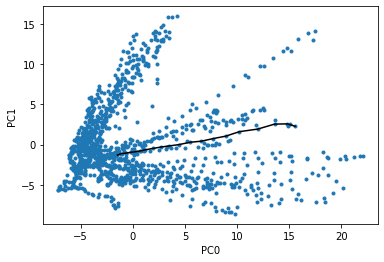

In [61]:
N = 20
pca = PCA(n_components=N, whiten=False, random_state=1337)
X_pca = pca.fit_transform(Xz.T).T
print(X_pca.shape)

fig, ax = plt.subplots()

ax.plot(X_pca[0,:], X_pca[1,:], '.')
ax.plot(X_pca[0,100:120], X_pca[1,100:120], 'k-')
# add color

ax.set_xlabel('PC0')
ax.set_ylabel('PC1')

Text(0, 0.5, 'PC1')

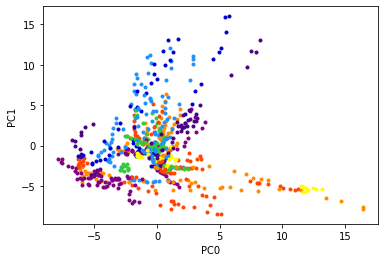

In [82]:
fig, ax = plt.subplots()

for i in range(stim.shape[0]):
    c = int(stim[i][2]/45)
    t = int(stim[i][0])-5000
    ax.plot(X_pca[3,t:t+10], X_pca[1,t:t+10], '.', color=color[c])
# add color

ax.set_xlabel('PC0')
ax.set_ylabel('PC1')

Text(0, 0.5, 'sigma')

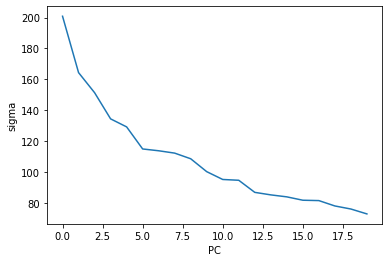

In [62]:
fig, ax = plt.subplots()

ax.plot(pca.singular_values_)
ax.set_xlabel('PC')
ax.set_ylabel('sigma')


Text(0, 0.5, 'variance explained (%)')

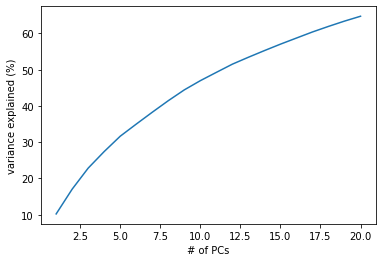

In [63]:
fig, ax = plt.subplots()

# S = np.cov(X_pca.T)
# print(S.shape)
# var_per_pc = np.diag(S) / np.trace(S)
# var_exp = np.cumsum(var_per_pc)

exp_var_pca = pca.explained_variance_ratio_
var_exp = np.cumsum(exp_var_pca)

ax.plot(np.arange(N) + 1, 100 * var_exp)
ax.set_xlabel('# of PCs')
ax.set_ylabel('variance explained (%)')


In [ ]:
# Some example code from: https://pietromarchesi.net/pca-neural-data.html#Trial-concatenated-PCA

In [70]:
from sklearn.manifold import Isomap, TSNE


/Users/hawkwings/miniforge3/envs/improv/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:328: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/hawkwings/miniforge3/envs/improv/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/hawkwings/miniforge3/envs/improv/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/hawkwings/miniforge3/envs/improv/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive

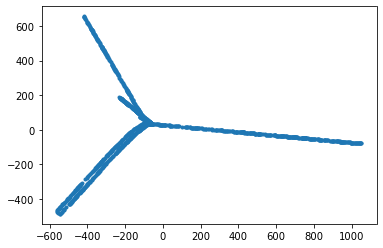

In [77]:
isomap = Isomap(n_components=2, n_jobs = 4, n_neighbors = 5)
isomap.fit(Xz.T)
X_isomap = isomap.transform(Xz.T).T

plt.plot(X_isomap[0,:], X_isomap[1,:], '.')

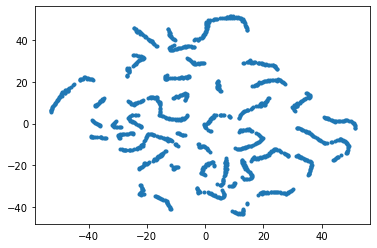

In [78]:
tsne = TSNE(n_components=2,learning_rate=300,perplexity = 30,early_exaggeration = 12,init = 'random',  random_state=2019)
X_tsne = tsne.fit_transform(Xz.T).T

plt.plot(X_tsne[0,:], X_tsne[1,:], '.')

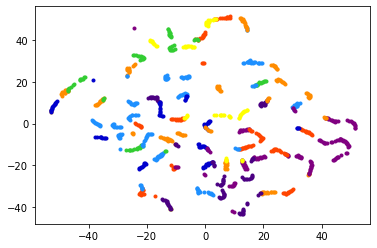

In [83]:
fig, ax = plt.subplots()

for i in range(stim.shape[0]):
    c = int(stim[i][2]/45)
    t = int(stim[i][0])-5000
    ax.plot(X_tsne[0,t:t+15], X_tsne[1,t:t+15], '.', color=color[c])

In [ ]:
#Some example code from: https://towardsdatascience.com/dimensionality-reduction-toolbox-in-python-9a18995927cd